In [100]:
import pandas as pd
data_path = 'https://github.com/chrisstrods/aflengine/raw/master/bench/matches_with_ladders.csv'
matches = pd.read_csv(data_path)

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [101]:
og_matches = matches

In [5]:
matches = og_matches

In [103]:
def change_date_type(matches: pd.DataFrame) -> pd.DataFrame:
    """
    Change date data to be type datetime
    """
    matches['date'] = pd.to_datetime(matches['date'],format="%Y-%m-%d")
    return matches

In [150]:
def days_break(matches: pd.DataFrame) -> pd.DataFrame:
    # Prepopulate the columns we're looking to fill
    matches['h_break'] = 0
    matches['h_played'] = matches['h_played'].astype(int)
    matches['a_break'] = 0
    matches['a_played'] = matches['a_played'].astype(int)
    
    # HOME TEAM
    for idx,row in matches.iterrows():
        season = row['season']
        played = row['h_played']
        hteam = row['hteam']
        
        # If the first game of the season, use a 7, which is the average break
        if played == 1:
            matches.at[idx,'h_break'] = 7
            
        # Else, find the last game and subtract the date differences
        else:
            last_game_dt = matches[(matches['season']==season)
                                   &(((matches['hteam']==hteam)&(matches['h_played']==(played-1)))
                                     |((matches['ateam']==hteam)&(matches['a_played']==(played-1))))]['date'].iloc[0]

            matches.at[idx,'h_break'] = (row['date'] - last_game_dt).days
            
    # Prepopulate the columns we're looking to fill
    matches['h_break'] = 0
    matches['h_played'] = matches['h_played'].astype(int)
    matches['a_break'] = 0
    matches['a_played'] = matches['a_played'].astype(int)
    
    # AWAY TEAM
    for idx,row in matches.iterrows():
        season = row['season']
        played = row['h_played']
        hteam = row['hteam']
        
        # If the first game of the season, use a 7, which is the average break
        if played == 1:
            matches.at[idx,'h_break'] = 7
            
        # Else, find the last game and subtract the date differences
        else:
            last_game_dt = matches[(matches['season']==season)
                                   &(((matches['hteam']==hteam)&(matches['h_played']==(played-1)))
                                     |((matches['ateam']==hteam)&(matches['a_played']==(played-1))))]['date'].iloc[0]

            matches.at[idx,'h_break'] = (row['date'] - last_game_dt).days
    
    return matches

In [92]:
matches[(matches['season']==1897)&(matches['hteam']=='Essendon')&(matches['h_played']==2)]['date'].iloc[0]

Timestamp('1897-01-15 00:05:00')

In [131]:
matches[(matches['season']==1915)&(((matches['hteam']=='St Kilda')&(matches['h_played']==(2)))|
                                   ((matches['ateam']=='St Kilda')&(matches['a_played']==(2))))]['date']

1372   1915-05-01
Name: date, dtype: datetime64[ns]

In [81]:
matches[(matches['season']==1897)&(matches['hteam']=='Essendon')][['hteam','ateam','date','h_played']]

,hteam,ateam,date,h_played
4,Essendon,Collingwood,1897-01-15 00:05:00,2
11,Essendon,Carlton,1897-01-24 00:05:00,3
25,Essendon,Melbourne,1897-01-22 00:06:00,7
29,Essendon,Geelong,1897-01-26 00:06:00,8
41,Essendon,Fitzroy,1897-01-17 00:07:00,11
47,Essendon,St Kilda,1897-01-24 00:07:00,12
51,Essendon,South Melbourne,1897-01-31 00:07:00,13


In [151]:
matches = days_break(matches)

In [123]:
matches['h_break'].iloc[1370]

7

In [127]:
matches[['season','round','date','hteam','ateam','h_played','a_played','h_break']].iloc[1370:1380]

,season,round,date,hteam,ateam,h_played,a_played,h_break
1370,1915,2,1915-05-01,Fitzroy,Melbourne,2,2,7
1371,1915,2,1915-05-01,South Melbourne,Carlton,2,2,7
1372,1915,2,1915-05-01,Geelong,St Kilda,1,2,7
1373,1915,2,1915-05-01,Richmond,Collingwood,2,2,7
1374,1915,3,1915-05-08,Richmond,South Melbourne,3,3,7
1375,1915,3,1915-05-08,Melbourne,Geelong,3,2,7
1376,1915,3,1915-05-08,St Kilda,Collingwood,3,3,0
1377,1915,3,1915-05-08,Essendon,Fitzroy,2,3,0
1378,1915,4,1915-05-15,Fitzroy,St Kilda,4,4,0
1379,1915,4,1915-05-15,Collingwood,Melbourne,4,4,0


In [129]:
matches[(matches['season']==1915)&((matches['hteam']=='St Kilda')|(matches['ateam']=='St Kilda'))][['season','round','date','hteam','ateam','h_played','a_played','h_break']]

,season,round,date,hteam,ateam,h_played,a_played,h_break
1366,1915,1,1915-04-24,St Kilda,South Melbourne,1,1,7
1372,1915,2,1915-05-01,Geelong,St Kilda,1,2,7
1376,1915,3,1915-05-08,St Kilda,Collingwood,3,3,0
1378,1915,4,1915-05-15,Fitzroy,St Kilda,4,4,0
1384,1915,5,1915-05-22,Essendon,St Kilda,4,5,0
1386,1915,6,1915-05-29,St Kilda,Melbourne,6,6,0
1391,1915,7,1915-06-05,Richmond,St Kilda,6,7,0
1398,1915,9,1915-06-19,St Kilda,Carlton,8,8,0
1405,1915,10,1915-06-26,South Melbourne,St Kilda,9,9,0
1406,1915,11,1915-07-03,St Kilda,Geelong,10,9,0


In [104]:
matches = change_date_type(matches)

In [21]:
matches['date'].iloc[0]

Timestamp('1897-01-08 00:05:00')

In [22]:
matches['date'].iloc[5]

Timestamp('1897-01-15 00:05:00')

In [24]:
x = matches['date'].iloc[5] - matches['date'].iloc[0]

In [42]:
x.days

7

In [37]:
from datetime import datetime

In [40]:
datetime.strptime('7','%d')

datetime.datetime(1900, 1, 7, 0, 0)

In [136]:
matches

,Unnamed: 0,round,venue,date,day,time,crowd,hteam,hteam_q1,hteam_q2,...,a_played,h_last_5_wins,h_last_5_pct,h_last_5_pts_for,h_last_5_pts_against,a_last_5_wins,a_last_5_pct,a_last_5_pts_for,a_last_5_pts_against,h_break
0,0,1,Victoria Park,1897-05-08,Sat,15:00:00,NaN,Collingwood,1.1.7,4.3.27,...,1,0,0,0,0,0,0,0,0,7
1,1,1,Brunswick St,1897-05-08,Sat,15:00:00,3000.0,Fitzroy,0.5.5,0.11.11,...,1,0,0,0,0,0,0,0,0,7
2,2,1,Lake Oval,1897-05-08,Sat,15:00:00,NaN,South Melbourne,0.2.2,1.4.10,...,1,0,0,0,0,0,0,0,0,7
3,3,1,Corio Oval,1897-05-08,Sat,15:00:00,NaN,Geelong,0.0.0,0.4.4,...,1,0,0,0,0,0,0,0,0,7
4,4,2,East Melbourne,1897-05-15,Sat,15:00:00,NaN,Essendon,1.3.9,1.5.11,...,2,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14927,14927,23,Bellerive Oval,2019-08-24,Sat,14:10:00,8202.0,North Melbourne,3.4.22,5.4.34,...,22,3,102,404,395,0,71,323,450,7
14928,14928,23,S.C.G.,2019-08-24,Sat,13:45:00,33722.0,Sydney,6.2.38,6.3.39,...,22,2,105,421,399,2,87,378,433,8
14929,14929,23,Eureka Stadium,2019-08-25,Sun,13:10:00,9560.0,Footscray,6.5.41,9.8.62,...,22,4,165,577,349,1,76,367,482,7
14930,14930,23,Adelaide Oval,2019-08-25,Sun,16:10:00,27504.0,Port Adelaide,3.4.22,7.9.51,...,22,3,115,452,390,1,79,352,443,8


In [138]:
matches['h_break'].value_counts()

 7     10057
 6      1596
 8      1196
 14      670
 9       505
 5       393
 12       79
 13       77
 2        70
 21       57
 15       54
 10       51
 4        31
 16       23
 3        19
 11       19
 28        7
-7         6
 98        4
-86        3
-14        3
-16        2
 23        2
 20        1
-19        1
-87        1
-79        1
 17        1
 93        1
 40        1
-9         1
Name: h_break, dtype: int64

In [149]:
matches[(matches['season']==1935)&(matches['round'].isin(list(range(12,16))))]

,Unnamed: 0,round,venue,date,day,time,crowd,hteam,hteam_q1,hteam_q2,...,a_played,h_last_5_wins,h_last_5_pct,h_last_5_pts_for,h_last_5_pts_against,a_last_5_wins,a_last_5_pct,a_last_5_pts_for,a_last_5_pts_against,h_break
3135,3135,12,Brunswick St,1935-07-13,Sat,14:45:00,15000.0,Fitzroy,2.2.14,5.6.36,...,12,2,85,374,437,4,124,383,308,7
3136,3136,12,Punt Rd,1935-07-13,Sat,14:45:00,16000.0,Richmond,2.3.15,7.5.47,...,12,2,115,403,348,1,72,311,427,7
3137,3137,12,Corio Oval,1935-07-13,Sat,14:45:00,14500.0,Geelong,4.4.28,5.5.35,...,12,2,109,458,417,5,175,504,287,7
3138,3138,12,Glenferrie Oval,1935-07-13,Sat,14:45:00,4000.0,Hawthorn,2.6.18,5.9.39,...,12,1,91,424,465,0,56,307,548,7
3139,3139,12,Lake Oval,1935-07-13,Sat,14:45:00,31000.0,South Melbourne,5.1.31,11.8.74,...,12,5,156,556,356,3,111,459,412,7
3140,3140,12,Windy Hill,1935-07-13,Sat,14:45:00,8000.0,Essendon,3.2.20,9.7.61,...,12,1,68,348,509,3,96,371,384,7
3141,3141,13,Princes Park,1935-07-20,Sat,14:45:00,12000.0,Carlton,4.3.27,8.10.58,...,13,5,187,580,309,1,86,423,491,7
3142,3142,13,M.C.G.,1935-07-20,Sat,14:45:00,12817.0,Melbourne,5.3.33,8.5.53,...,13,4,107,394,367,1,99,417,418,7
3143,3143,13,Victoria Park,1935-07-20,Sat,14:45:00,18000.0,Collingwood,2.5.17,6.12.48,...,13,3,97,438,448,1,73,353,481,7
3144,3144,13,Junction Oval,1935-07-20,Sat,14:45:00,16000.0,St Kilda,3.4.22,8.8.56,...,13,4,118,382,322,1,71,356,499,7


In [153]:
matches = pd.read_csv(r'/Users/t_raver9/Desktop/projects/footy/aflengine-master/bench/matches_with_ladders.csv')

In [154]:
matches.tail(30)

,Unnamed: 0,round,venue,date,day,time,crowd,hteam,hteam_q1,hteam_q2,...,h_last_5_wins,h_last_5_pct,h_last_5_pts_for,h_last_5_pts_against,a_last_5_wins,a_last_5_pct,a_last_5_pts_for,a_last_5_pts_against,h_break,a_break
14902,14902,20,Docklands,2019-08-04,Sun,15:20:00,32802.0,Carlton,4.1.25,6.3.39,...,3,107,430,401,4,152,510,334,8,8
14903,14903,20,M.C.G.,2019-08-04,Sun,13:10:00,33577.0,Collingwood,4.4.28,10.6.66,...,2,96,402,415,0,53,336,626,9,7
14904,14904,20,Gabba,2019-08-04,Sun,16:40:00,25831.0,Brisbane Lions,4.3.27,7.7.49,...,5,136,463,338,3,106,427,401,8,7
14905,14905,21,Adelaide Oval,2019-08-10,Sat,13:40:00,29568.0,Port Adelaide,4.4.28,7.7.49,...,2,105,396,377,0,79,330,414,7,7
14906,14906,21,Gabba,2019-08-10,Sat,16:35:00,22530.0,Brisbane Lions,4.3.27,10.5.65,...,5,161,513,317,0,53,331,620,6,6
14907,14907,21,Docklands,2019-08-10,Sat,19:25:00,41816.0,Essendon,1.1.7,1.3.9,...,3,75,388,515,3,130,493,379,7,6
14908,14908,21,Kardinia Park,2019-08-10,Sat,19:25:00,21664.0,Geelong,1.3.9,3.9.27,...,3,115,382,331,1,76,328,427,7,8
14909,14909,21,M.C.G.,2019-08-10,Sat,13:45:00,31903.0,Melbourne,1.4.10,2.6.18,...,0,79,342,432,3,101,409,401,7,6
14910,14910,21,Docklands,2019-08-11,Sun,13:10:00,17715.0,St Kilda,4.3.27,6.5.41,...,3,100,419,419,2,87,335,381,8,8
14911,14911,21,Perth Stadium,2019-08-11,Sun,15:20:00,54994.0,West Coast,3.4.22,6.6.42,...,4,124,478,383,2,114,458,399,7,8


In [158]:
for game in range(5):
    print(game)

0
1
2
3
4


In [212]:
def x_game_average_break(matches: pd.DataFrame, num_games: int) -> pd.DataFrame:
    # Prepopulate fields
    matches['h_ave_break_5'] = 0.0
    matches['a_ave_break_5'] = 0.0
    i = 0

    # HOME TEAM
    for idx,row in matches.iterrows():
        num_games_tmp = num_games # Required for later equivalence
        hteam = row['hteam']
        played = row['h_played']
        season = row['season']
        # Case 1: the team has played x number of games in the season already
        if played <= num_games:
            total_break = 0
            num_games_tmp = played
            for games in range(num_games_tmp):
                total_break += matches[(matches['season']==season) & 
                (((matches['hteam'] == hteam) & (matches['h_played'] == (played-games))) |
                (((matches['ateam'] == hteam) & (matches['a_played'] == (played-games)))))]['h_break'].iloc[0]
                
            ave_break = float(total_break/num_games)
            matches.at[idx,'h_ave_break_5'] = ave_break
            print(total_break,num_games,ave_break,season,row['round'])

        # Case 2: the team has played less than x number of games in the season already
        else:
            total_break = 0
            num_games_tmp = played
            for games in range(num_games_tmp):
                total_break += matches[(matches['season']==season) & 
                (((matches['hteam'] == hteam) & (matches['h_played'] == (played-games))) |
                (((matches['ateam'] == hteam) & (matches['a_played'] == (played-games)))))]['h_break'].iloc[0]
            ave_break = float(total_break/num_games)
            matches.at[idx,'h_ave_break_5'] = ave_break

    # AWAY TEAM
    i = 0
    for idx,row in matches.iterrows():
        num_games_tmp = num_games
        ateam = row['ateam']
        played = row['a_played']
        season = row['season']
        # Case 1: the team has played x number of games in the season already
        if played <= num_games:
            total_break = 0
            num_games_tmp = played
            for games in range(num_games_tmp):
                total_break += matches[(matches['season']==season) & 
                (((matches['hteam'] == ateam) & (matches['h_played'] == (played-games))) |
                (((matches['ateam'] == ateam) & (matches['a_played'] == (played-games)))))]['a_break'].iloc[0]
                
            ave_break = float(total_break/num_games)
            matches.at[idx,'a_ave_break_5'] = ave_break

        # Case 2: the team has played less than x number of games in the season already
        else:
            total_break = 0
            num_games_tmp = played
            for games in range(num_games_tmp):
                total_break += matches[(matches['season']==season) & 
                (((matches['hteam'] == ateam) & (matches['h_played'] == (played-games))) |
                (((matches['ateam'] == ateam) & (matches['a_played'] == (played-games)))))]['a_break'].iloc[0]
            ave_break = float(total_break/num_games)
            matches.at[idx,'a_ave_break_5'] = ave_break

    return matches

In [213]:
matches = x_game_average_break(matches=matches,num_games=5)

7 5 1.4 1897 1
7 5 1.4 1897 1
7 5 1.4 1897 1
7 5 1.4 1897 1
14 5 2.8 1897 2
14 5 2.8 1897 2
14 5 2.8 1897 2
14 5 2.8 1897 2
21 5 4.2 1897 3
21 5 4.2 1897 3
23 5 4.6 1897 3
23 5 4.6 1897 3
28 5 5.6 1897 4
28 5 5.6 1897 4
28 5 5.6 1897 4
28 5 5.6 1897 4
37 5 7.4 1897 5
35 5 7.0 1897 5
35 5 7.0 1897 5
33 5 6.6 1897 5
7 5 1.4 1898 1
7 5 1.4 1898 1
7 5 1.4 1898 1
7 5 1.4 1898 1
14 5 2.8 1898 2
14 5 2.8 1898 2
14 5 2.8 1898 2
14 5 2.8 1898 2
17 5 3.4 1898 3
17 5 3.4 1898 3
17 5 3.4 1898 3
17 5 3.4 1898 3
21 5 4.2 1898 4
21 5 4.2 1898 4
21 5 4.2 1898 4
21 5 4.2 1898 4
28 5 5.6 1898 5
28 5 5.6 1898 5
28 5 5.6 1898 5
28 5 5.6 1898 5


KeyboardInterrupt: 

In [163]:
sum(matches['h_break'] != matches['h_ave_break_5'])

0

In [214]:
matches[['season','round','date','hteam','ateam','h_played','a_played','h_break','h_ave_break_5','a_ave_break_5']].iloc[20:200]

,season,round,date,hteam,ateam,h_played,a_played,h_break,h_ave_break_5,a_ave_break_5
20,1897,6,1897-06-19,St Kilda,Carlton,6,6,14,10.2,0.0
21,1897,6,1897-06-19,Geelong,Fitzroy,6,6,14,9.8,0.0
22,1897,6,1897-06-19,Melbourne,Collingwood,6,6,14,9.8,0.0
23,1897,6,1897-06-19,South Melbourne,Essendon,6,6,14,9.8,0.0
24,1897,7,1897-06-22,Fitzroy,South Melbourne,7,7,3,10.4,0.0
...,...,...,...,...,...,...,...,...,...,...
195,1900,1,1900-05-05,Carlton,Geelong,1,1,7,0.0,0.0
196,1900,2,1900-05-12,Fitzroy,Carlton,2,2,7,0.0,0.0
197,1900,2,1900-05-12,Melbourne,Essendon,2,2,7,0.0,0.0
198,1900,2,1900-05-12,South Melbourne,St Kilda,2,2,7,0.0,0.0


In [183]:
matches[(matches['season']==2000) & 
                (((matches['hteam'] == 'Melbourne') & (matches['h_played'] == (4-2))) |
                (((matches['ateam'] == 'Melbourne') & (matches['a_played'] == (4-2)))))]

,Unnamed: 0,round,venue,date,day,time,crowd,hteam,hteam_q1,hteam_q2,...,h_last_5_pts_for,h_last_5_pts_against,a_last_5_wins,a_last_5_pct,a_last_5_pts_for,a_last_5_pts_against,h_break,a_break,h_ave_break_5,a_ave_break_5
11253,11253,2,M.C.G.,2000-03-17,Fri,19:40:00,23348.0,Melbourne,7.0.42,13.2.80,...,417,500,3,98,557,568,9,7,0,0


In [215]:
'h_ave_break_' + '3'

'h_ave_break_3'

In [204]:
x

5.833333333333333

In [216]:
df = pd.read_csv(r'/Users/t_raver9/Desktop/projects/footy/aflengine-master/bench/matches_with_ladders_form_breaks.csv')

In [217]:
df

,Unnamed: 0,round,venue,date,day,time,crowd,hteam,hteam_q1,hteam_q2,...,h_last_5_pts_for,h_last_5_pts_against,a_last_5_wins,a_last_5_pct,a_last_5_pts_for,a_last_5_pts_against,h_break,a_break,h_ave_break_3,a_ave_break_3
0,0,1,Victoria Park,1897-05-08,Sat,15:00:00,NaN,Collingwood,1.1.7,4.3.27,...,0,0,0,0,0,0,7,7,7.000000,7.000000
1,1,1,Brunswick St,1897-05-08,Sat,15:00:00,3000.0,Fitzroy,0.5.5,0.11.11,...,0,0,0,0,0,0,7,7,7.000000,7.000000
2,2,1,Lake Oval,1897-05-08,Sat,15:00:00,NaN,South Melbourne,0.2.2,1.4.10,...,0,0,0,0,0,0,7,7,7.000000,7.000000
3,3,1,Corio Oval,1897-05-08,Sat,15:00:00,NaN,Geelong,0.0.0,0.4.4,...,0,0,0,0,0,0,7,7,7.000000,7.000000
4,4,2,East Melbourne,1897-05-15,Sat,15:00:00,NaN,Essendon,1.3.9,1.5.11,...,0,0,0,0,0,0,7,7,7.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14927,14927,23,Bellerive Oval,2019-08-24,Sat,14:10:00,8202.0,North Melbourne,3.4.22,5.4.34,...,404,395,0,71,323,450,7,8,6.727273,6.818182
14928,14928,23,S.C.G.,2019-08-24,Sat,13:45:00,33722.0,Sydney,6.2.38,6.3.39,...,421,399,2,87,378,433,8,7,7.181818,7.909091
14929,14929,23,Eureka Stadium,2019-08-25,Sun,13:10:00,9560.0,Footscray,6.5.41,9.8.62,...,577,349,1,76,367,482,7,8,7.363636,7.363636
14930,14930,23,Adelaide Oval,2019-08-25,Sun,16:10:00,27504.0,Port Adelaide,3.4.22,7.9.51,...,452,390,1,79,352,443,8,8,7.363636,7.727273


In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([0.000e+00, 0.000e+00, 2.100e+01, 1.000e+00, 0.000e+00, 4.000e+00,
        2.900e+01, 2.000e+00, 2.100e+01, 2.000e+00, 7.700e+01, 4.400e+01,
        1.010e+02, 1.390e+02, 8.000e+01, 2.660e+02, 3.050e+02, 3.390e+02,
        6.470e+02, 2.740e+02, 5.299e+03, 7.010e+02, 8.690e+02, 8.090e+02,
        9.710e+02, 8.790e+02, 5.160e+02, 5.470e+02, 4.080e+02, 1.950e+02,
        4.060e+02, 1.940e+02, 1.120e+02, 7.700e+01, 1.200e+02, 8.500e+01,
        4.400e+01, 7.600e+01, 2.800e+01, 1.100e+01, 3.900e+01, 9.000e+00,
        9.000e+00, 5.400e+01, 1.000e+00, 1.100e+01, 7.000e+00, 2.000e+00,
        8.000e+00, 2.000e+00]),
 array([ 5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,
         6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,
         7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,
         8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,
         9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. ]),
 <a list of 50 Patch objects

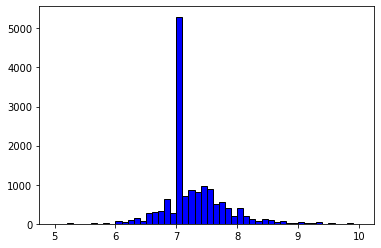

In [221]:
plt.hist(df['h_ave_break_3'], color = 'blue', edgecolor = 'black',
         bins = 50,range=(5,10))

In [222]:
df.columns

Index(['Unnamed: 0', 'round', 'venue', 'date', 'day', 'time', 'crowd', 'hteam',
       'hteam_q1', 'hteam_q2', 'hteam_q3', 'hteam_q4', 'ateam', 'ateam_q1',
       'ateam_q2', 'ateam_q3', 'ateam_q4', 'umpire1', 'umpire2', 'umpire3',
       'umpire1games', 'umpire2games', 'umpire3games', 'hteam_et', 'ateam_et',
       'season', 'matchid', 'homeodds', 'homeline', 'awayodds', 'awayline',
       'hscore', 'ascore', 'hteam_q1_goals', 'hteam_q1_behinds',
       'hteam_q1_score', 'hteam_q2_goals', 'hteam_q2_behinds',
       'hteam_q2_score', 'hteam_q3_goals', 'hteam_q3_behinds',
       'hteam_q3_score', 'hteam_q4_goals', 'hteam_q4_behinds',
       'hteam_q4_score', 'ateam_q1_goals', 'ateam_q1_behinds',
       'ateam_q1_score', 'ateam_q2_goals', 'ateam_q2_behinds',
       'ateam_q2_score', 'ateam_q3_goals', 'ateam_q3_behinds',
       'ateam_q3_score', 'ateam_q4_goals', 'ateam_q4_behinds',
       'ateam_q4_score', 'h_wins', 'h_losses', 'h_draws', 'h_points_for',
       'h_points_against', 'h_per

In [223]:
# Is there a correlation?
sum(df['hscore'] > df['ascore'])/len(df)

0.575475488882936

In [229]:
# To look for correlation: take the subset of games where the home team has had more rest. Then check the 
# proportion of home team wins
df_h_rested = df[df['h_ave_break_3'] > df['a_ave_break_3']]
sum(df_h_rested['hscore'] > df_h_rested['ascore'])/len(df_h_rested)

0.5711892797319933

In [230]:
# This provides no additional information. What about just the single break between games?
df_h_rested = df[df['h_break'] > df['a_break']]
sum(df_h_rested['hscore'] > df_h_rested['ascore'])/len(df_h_rested)

0.5826521344232516

In [235]:
import numpy as np
np.std(df['h_ave_break_3'])

0.902505759562069

In [236]:
np.std(df['h_break'])

3.199497530258173

In [237]:
sum(df['hscore'] < df['ascore'])/len(df)

0.4144789713367265

In [238]:
df_a_rested = df[df['h_ave_break_3'] < df['a_ave_break_3']]
sum(df_a_rested['hscore'] < df_a_rested['ascore'])/len(df_a_rested)

0.41713483146067415